In [ ]:
## Investigating Down-mixing

Lo frequency = 18749286322.187534

test_frequency = 18,907,952,975.819836




158666653.63230133


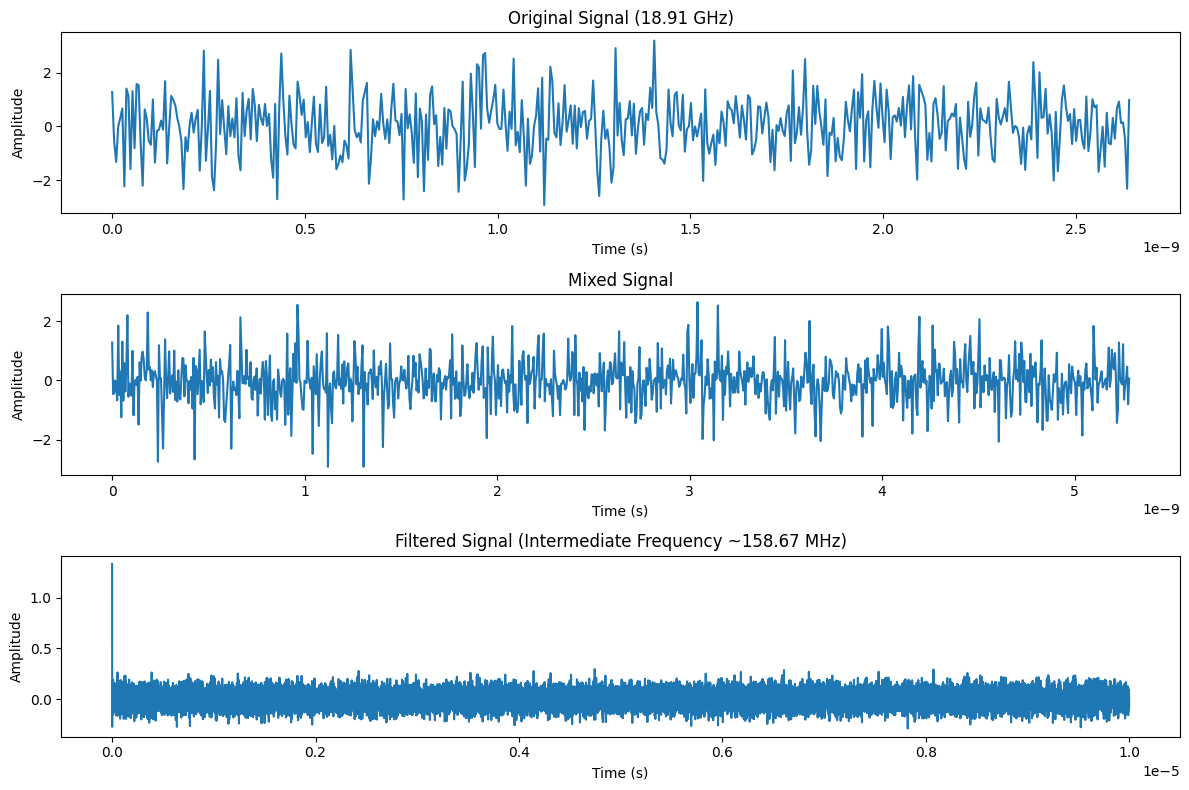

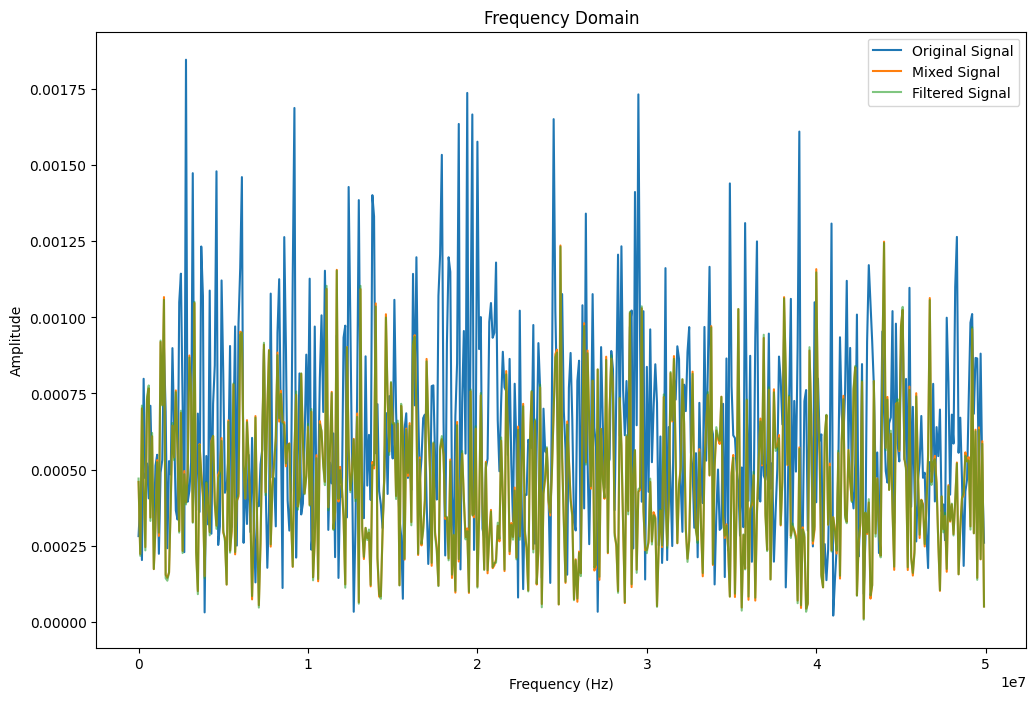

945501
1.3892358253880976


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

fs = 18.91e10
duration = 1e-5

t = np.arange(0, duration, 1/fs)

f_signal = 18907952975.819836 
f_lo = 18749286322.187534

f_if = f_signal - f_lo

print(f_if)

# signal = np.cos(2 * np.pi * f_signal * t)

signal = np.random.normal(0, 1, len(t))
lo = np.cos(2 * np.pi * f_lo * t)


# Design a low-pass filter to isolate the IF component
# Use a cutoff slightly above the intermediate frequency
cutoff = 1e9  # 200 MHz cutoff frequency
nyquist = fs / 2
b, a = butter(5, cutoff / nyquist, btype='low')

mixed_signal = signal * lo


# Filter the mixed signal
filtered_signal = filtfilt(b, a, mixed_signal)

# Plot the signals
plt.figure(figsize=(12, 8))

# Original signal
plt.subplot(3, 1, 1)
plt.plot(t[:500], signal[:500])
plt.title('Original Signal (18.91 GHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Mixed signal
plt.subplot(3, 1, 2)
plt.plot(t[:1000], mixed_signal[:1000])
plt.title('Mixed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Filtered signal (IF)
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal (Intermediate Frequency ~158.67 MHz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


fft_original = np.fft.rfft(signal, norm='forward')
fft_mixed = np.fft.rfft(mixed_signal, norm='forward')
fft_filtered = np.fft.rfft(filtered_signal, norm='forward')

freqs = np.fft.rfftfreq(len(t), 1/fs)

plt.figure(figsize=(12, 8))

plt.plot(freqs[:500], np.abs(fft_original[:500]), label='Original Signal')
plt.plot(freqs[:500], np.abs(fft_mixed[:500]), label='Mixed Signal')
plt.plot(freqs[:500], np.abs(fft_filtered[:500]), label='Filtered Signal', alpha=0.6)
plt.legend()
# plt.xscale('log')
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()


print(len(np.abs(fft_filtered)))


print(np.mean(np.abs(fft_original[:500]))/(np.mean(np.abs(fft_filtered[:500]))))

In [2]:
import numpy as np

# Function to calculate signal power
def calculate_power(signal):
    return np.mean(signal**2)

# Calculate power of the original signal
original_signal_power = calculate_power(signal)

# Calculate power of the down-mixed, filtered signal
filtered_signal_power = calculate_power(filtered_signal)

# Display the results
print(f"Power of the original signal: {original_signal_power:.6e}")
print(f"Power of the down-mixed signal: {filtered_signal_power:.6e}")

# Compare the two powers
power_ratio = original_signal_power / filtered_signal_power
print(f"Ratio of down-mixed signal power to original signal power: {power_ratio:.6e}")

Power of the original signal: 9.992098e-01
Power of the down-mixed signal: 4.873944e-03
Ratio of down-mixed signal power to original signal power: 2.050105e+02
